## Aufgabe 1

### Lineare Regression Mathematisch



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('301_IceCream.csv')
df.head()

,Temperature,SoldIceCream
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406


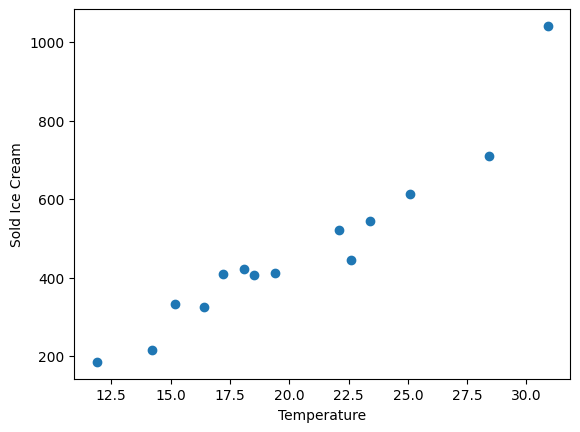

In [13]:
# Erstellen Sie den Scatterplot
plt.scatter(df['Temperature'], df['SoldIceCream'])

# Beschriften Sie die Achsen
plt.xlabel('Temperature')
plt.ylabel('Sold Ice Cream')

# Zeigen Sie den Plot an
plt.show()

In [37]:


def train(X, Y, steps, eta):
    # Initialisieren Sie die Gewichte
    w0 = 0
    w1 = 0
    
    # Konvertieren Sie die Listen in Numpy-Arrays
    X = np.array(X)
    Y = np.array(Y)
    
    # Führen Sie die Lernschritte durch
    for _ in range(steps):
        # Berechnen Sie die Vorhersagen
        Y_pred = w0 + w1 * X
        
        # Berechnen Sie die Fehler
        errors = Y - Y_pred
        
        # Aktualisieren Sie die Gewichte
        w0 = w0 + eta * errors.mean()
        w1 = w1 + eta * (errors * X).mean()
    
    return w0, w1

""" Lösung
w0 = 0
    w1 = 0
    for step in range(steps):
        dw0 = 0
        dw1 = 0
        for x,y in zip(X,Y):
            dw0 = dw0 - y + w1*x + w0
            dw1 = dw1 - x*y + w1*x*x + w0*x
        w0 = w0 - eta * dw0
        w1 = w1 - eta * dw1

    return w0, w1
"""

''

In [15]:
# Extrahieren Sie die Daten
X = df['Temperature'].tolist()
Y = df['SoldIceCream'].tolist()

# Trainieren Sie das Modell
w0, w1 = train(X, Y, steps=200000, eta=0.0001)

# Geben Sie die Gewichte aus
print(f"w0: {w0}, w1: {w1}")
# Was b edeuten die Gewichte konkret in diesem Fall?
# w0: -211.8623135544634, w1: 33.9430312858633
# w0 ist der y-Achsenabschnitt und w1 ist die Steigung der Linie.
# In diesem Fall bedeutet das, dass die Verkaufszahlen um 33,94 steigen, wenn die Temperatur um 1 Grad steigt.

w0: -211.8623135544634, w1: 33.9430312858633


In [16]:
def predict(x, w0, w1):
    return w0 + w1 * x

x_new = 25  # Eine neue Temperatur
y_pred = predict(x_new, w0, w1)
print(f"Die Vorhersage für eine Temperatur von {x_new} ist {y_pred}")

Die Vorhersage für eine Temperatur von 25 ist 636.713468592119


In [17]:
# Finden Sie die kleinste und größte Temperatur
xmin = df['Temperature'].min()
xmax = df['Temperature'].max()

# Berechnen Sie die entsprechenden Vorhersagen
ymin = predict(xmin, w0, w1)
ymax = predict(xmax, w0, w1)

print(f"xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}")

xmin: 11.9, xmax: 30.9, ymin: 192.05975874730984, ymax: 836.9773531787124


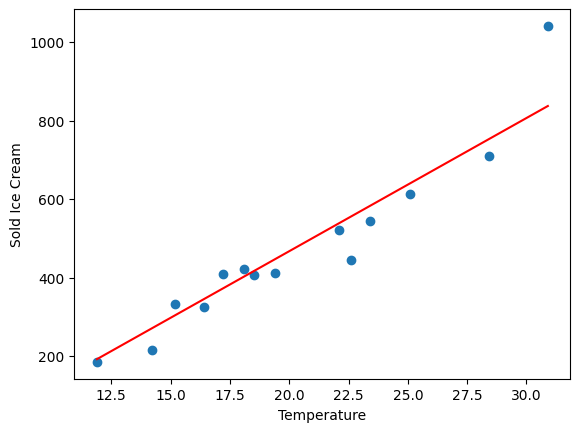

In [18]:
# Erstellen Sie den Scatterplot
plt.scatter(df['Temperature'], df['SoldIceCream'])

# Zeichnen Sie die Linie
plt.plot([xmin, xmax], [ymin, ymax], color='red')

# Beschriften Sie die Achsen
plt.xlabel('Temperature')
plt.ylabel('Sold Ice Cream')

# Zeigen Sie den Plot an
plt.show()

Der Plot zeigt, dass die lineare Regression ein brauchbares Modell ist, um den Zusammenhang zwischen Temperatur und Eiscreme-Verkauf zu beschreiben. Die positive Steigung der Regressionslinie deutet darauf hin, dass höhere Temperaturen zu höheren Verkaufszahlen führen. Der Ausreißer bei 30 Grad sollte jedoch weiter untersucht werden, um zu verstehen, ob er durch besondere Umstände verursacht wurde und ob er das Modell beeinflussen sollte.

## Aufgabe 2
### SciKit-Learn, R2 und mehrdimensionale Regression

In [19]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Die Variablen sind  
- 'data': Feature-Daten
- 'target': die Zielgroesse

In [21]:
X = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y = pd.DataFrame(target)
y.columns = ['MEDV']
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
full = pd.concat([X, y], axis = 1, sort = False)
full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


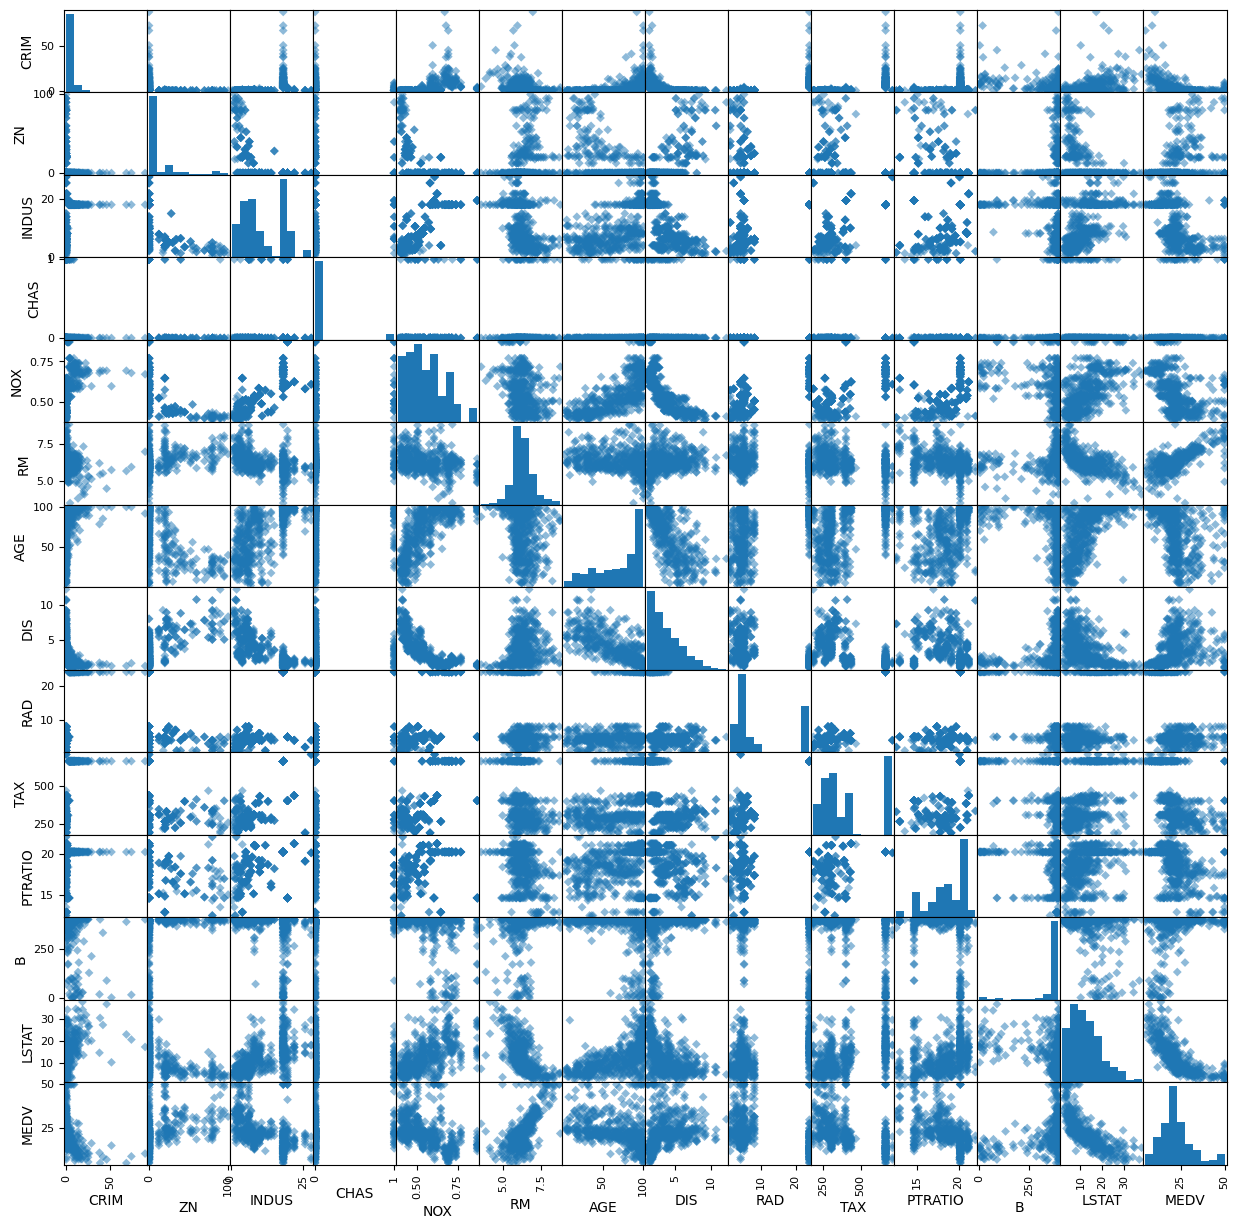

In [24]:
myscatter = pd.plotting.scatter_matrix(full, figsize = (15,15), marker = 'D', s = 20)

In [25]:
full.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'medv')

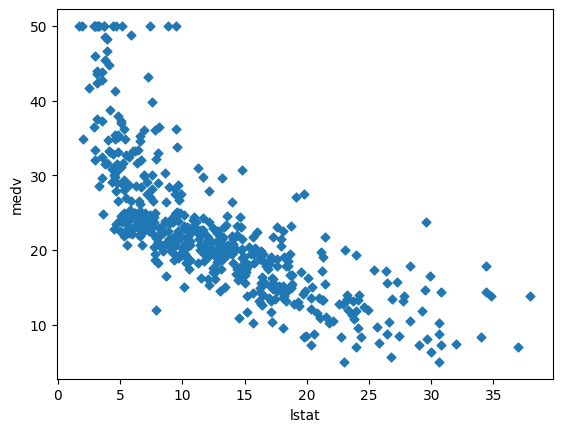

In [26]:
plt.scatter(X['LSTAT'], y, marker = 'D', s = 20)
plt.xlabel('lstat')
plt.ylabel('medv')

In [27]:
simple_model = LinearRegression()
simple_model.fit(X[['LSTAT']], y)

LinearRegression()

In [28]:
print("w_0 =", simple_model.intercept_, ", w_1 =", simple_model.coef_)

w_0 = [34.55384088] , w_1 = [[-0.95004935]]


**Interpratation** der Parameter: wenn LSTAT um eine Einheit steigt, so fällt im Mittel der Preis um 0.95 Einheiten. 

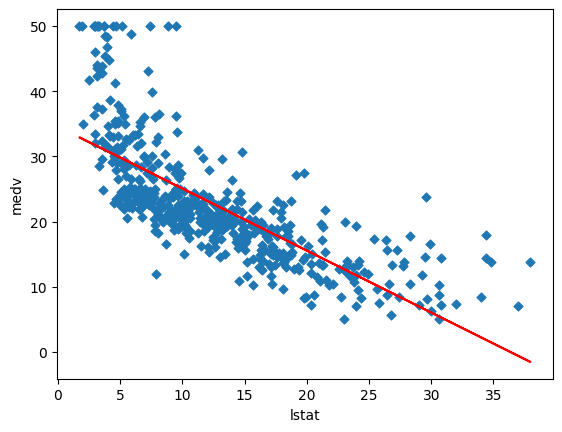

In [29]:
tX = X[['LSTAT']]
ty = simple_model.predict(tX)
plt.scatter(X['LSTAT'], y, marker='D',s=20)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.plot(tX,ty,c='r')

Der Zusammenhang zwischen LSTAT und der Zielgröße scheint generell eher nicht linear zu sein. 

Das lineare Modell als Annhäherung macht prinzipiell Sinn. Jedoch wird der Hauspreis bei geringen LSTAT Werten systematisch unterschätzt. Hier zeigt sich die Limitation des linearen Modells, da dort eine Nichtlinearität gefordert wäre.  

In [30]:
simple_model.score(X[['LSTAT']],y)

0.5441462975864799

Der Wert bedeutet, dass ca. die Hälfte (54 %) der Varianz in den Daten durch das einfache lineare Modell erklärt wird.

In [31]:
multi_model = LinearRegression()
multi_model.fit(X[['LSTAT','RM']], y)
print(multi_model.score(X[['LSTAT','RM']], y)) # R^2-Wert

0.6385616062603403


Der Wert bedeutet, dass ca. die Hälfte (54 %) der Varianz in den Daten durch das einfache lineare Modell erklärt wird.

In [32]:
print(multi_model.intercept_, multi_model.coef_)

[-1.35827281] [[-0.64235833  5.09478798]]


- *Intercept:* Median-Hauspreis von -1.35 Tausden Dollar, wenn die beiden Features / Kovariablen gleich Null sind (*Anmerkung:* wir sind hier wieder außerhalb des Bereiches, für den wir Beobachtungen haben)
- *Koeffizient für LSTAT:* Mit jeder Einheit, die sich LSTAT erhöht verringert (negatives Vorzeichen!) sich der Median-Hauspreis im Mittel um 0.64 Tsd. US-Dollar (bei sonst gleichen Kovariablen, c.p.)
- *Koeffizient für RM:* Mit jeder Einheit, die sich RM erhöht erhöht sich der Median-Hauspreis im Mittel um 5.09 Tsd. US-Dollar (bei sonst gleichen Kovariablen, c.p.)

In [33]:
full_model = LinearRegression()
full_model.fit(X, y)
print(full_model.score(X, y))

0.7406426641094095


Tendenziell kann ein Modell bei Hinzunahme weiterer Features nur mehr (oder zumindest gleich viel) Streuung erklären. Es gibt daher andere Modellwahlkrietrien, die nicht nur berücksichtigen, wie gut das Modell zu den Daten passt, sondern gleichzeitig auch Modellkomplexität bestrafen, z.B. AIC-Kriterium.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
tts_model = LinearRegression()
tts_model.fit(X_train, y_train)
print(tts_model.score(X_train, y_train))
print(tts_model.score(X_test, y_test))

0.7730135569264234
0.5892223849182527


### Aufgabe 2.12
- Der $R^2$-Wert ist nun von ca. 0.74 auf 0.59 gesunken. 
- Der Wert hat sich verändert, da wir nicht mehr auf dem gesamten Datensatz trainieren und wir ihn vor allem nicht mehr auf den Daten berechnen, auf denen wir das Modell trainiert haben. 
- Dass der Wert so stark sinkt, kann ein Indiz dafür sein, dass wir vorher im Bereich der Überanpassung unterwegs waren, d.h. das Modell hat sich zu stark an die Daten angepasst und hat zu wenig generalisiert. Während wir vorher evtl. irrtümlich gedacht haben, dass das Modell relativ gut ist, müssten wir nun unsere Einschätzung überdenken. Dieses Beispiel zeigt, wie wichtig eine saubere Herangehensweise mit den richtigen Methoden v.a. der Modellauswahl ist.

*Hinweise:* 

- Tendenziell neigen lineare Regressionsmodelle eher weniger zur Überanpassung, da sie strukturell sehr starr sind (verglichen mit flexibleren Methoden, wie z.B. neuronalen Netzen). Bei relativ wenigen Daten und vielen Features kann das Problem aber auch hier auftreten.
- Zusätzlich zur Problematik des Overfitting könnte das Modell auch schlichtweg unter weniger Trainingsdaten (nur noch knapp 400 Beobachtungen statt der vollen 500) leiden.


**Achtung:** Man kann natürlich auch einfach Pech haben mit dem durchgeführten Train / Test-Split:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
tts_model = LinearRegression()
tts_model.fit(X_train, y_train)
print("R2 auf Traningsdaten:", tts_model.score(X_train, y_train))
print("R2 auf Traningsdaten:", tts_model.score(X_test, y_test))

R2 auf Traningsdaten: 0.7377734707180098
R2 auf Traningsdaten: 0.7451430642919574


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
tts_model = LinearRegression()
tts_model.fit(X_train, y_train)
print("R2 auf Traningsdaten:", tts_model.score(X_train, y_train))
print("R2 auf Traningsdaten:", tts_model.score(X_test, y_test))

R2 auf Traningsdaten: 0.750121534530608
R2 auf Traningsdaten: 0.6709339839115627


**Daher grundsätzliche mehrere Splits probieren und Ergebnisse <u>immer</u> kritisch hinterfragen!**